In [1]:
# importations
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# chargement du jeu de données Iris
from sklearn import datasets
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# découpage initial en données d'apprentissage et données de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

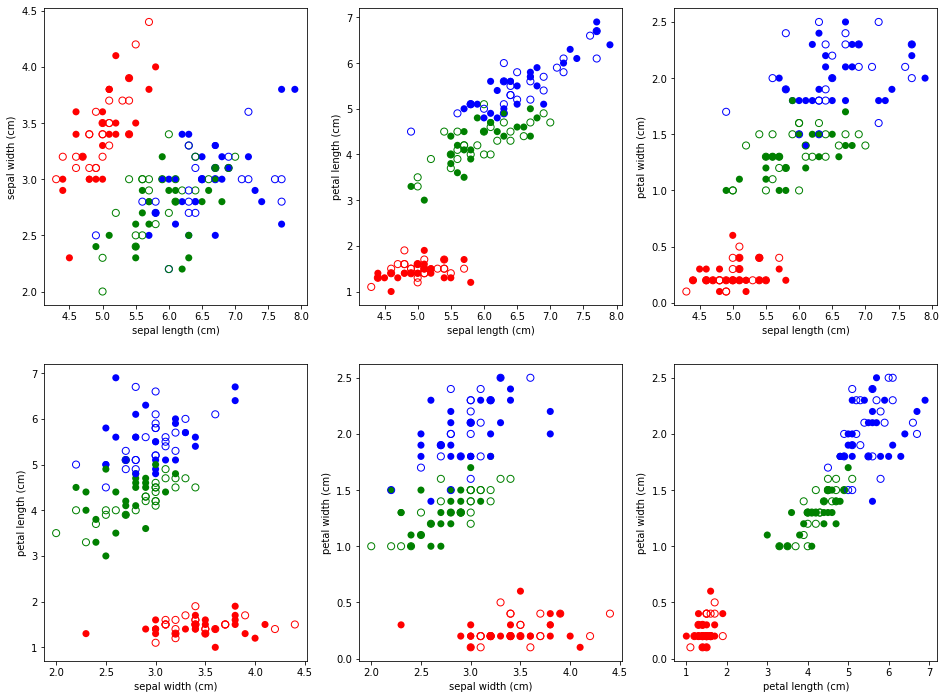

In [2]:
fig = plt.figure(figsize=(16, 12))
n_features = data.shape[-1]
n_plots = 6
idx = 1
cmp = np.array(['r', 'g', 'b'])
for dim1 in range(0, n_features):
    for dim2 in range(dim1+1, n_features):
        fig.add_subplot(2, n_plots // 2, idx)
        plt.scatter(X_train[:, dim1], X_train[:, dim2],c=cmp[y_train], s=50, edgecolors='none')
        plt.scatter(X_test[:,  dim1], X_test[:, dim2], c='none',  s=50, edgecolors=cmp[y_test])
        plt.xlabel(iris.feature_names[dim1])
        plt.ylabel(iris.feature_names[dim2])
        idx += 1
plt.show()

In [3]:
# emploi de PMC
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1, tol=5e-3)

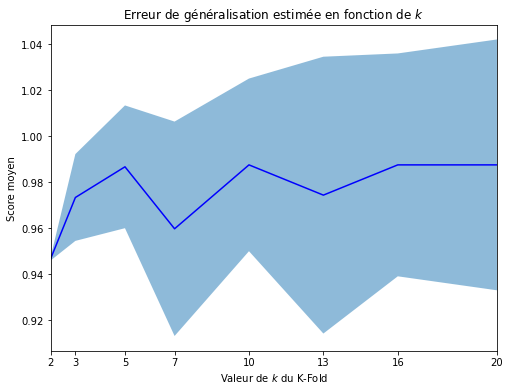

In [4]:
# KFold pour différentes valeurs de k
from sklearn.model_selection import KFold

# valeurs de k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20])

# préparation des listes pour stocker les résultats
cv_scores = []
cv_scores_std = []

for k in n_folds:    # pour chaque valeur de k
    kf = KFold(n_splits=k)
    scores = []
    # apprentissage puis évaluation d'un modèle sur chaque split
    for train_idx, val_idx in kf.split(X_train):
        # apprentissage avec .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # calcul de la moyenne et de l'écart-type des performances obtenues
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)

# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure(figsize=(8, 6))
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std, alpha=0.5)
plt.xlabel("Valeur de $k$ du K-Fold")
plt.ylabel("Score moyen")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Erreur de généralisation estimée en fonction de $k$")
plt.show()

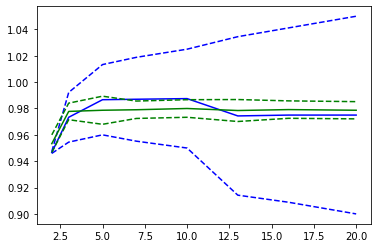

In [6]:
kcvscores = list()
kcvscores_std = list()
testscores = list()
testscores_std = list()
# valeurs de k
kcvfs = np.array([2, 3, 5, 7, 10, 13, 16, 20])
for kcvf in kcvfs:    # pour chaque valeur de k
  kf = KFold(n_splits=kcvf)
  these_scores = list()
  these_test_scores = list()
  # apprentissage puis évaluation d'un modèle sur chaque split
  for train_idx, test_idx in kf.split(X_train):
    clf.fit(X_train[train_idx], y_train[train_idx])
    these_scores.append(clf.score(X_train[test_idx], y_train[test_idx]))
    these_test_scores.append(clf.score(X_test, y_test))
  # calcul de la moyenne et de l'écart-type des performances obtenues
  kcvscores.append(np.mean(these_scores))
  kcvscores_std.append(np.std(these_scores))
  testscores.append(np.mean(these_test_scores))
  testscores_std.append(np.std(these_test_scores))

# création de np.array à partir des listes
kcvscores, kcvscores_std = np.array(kcvscores), np.array(kcvscores_std)
testscores, testscores_std = np.array(testscores), np.array(testscores_std)

# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure()
plt.plot(kcvfs, kcvscores, 'b')
plt.plot(kcvfs, kcvscores+kcvscores_std, 'b--')
plt.plot(kcvfs, kcvscores-kcvscores_std, 'b--')
plt.plot(kcvfs, testscores, 'g')
plt.plot(kcvfs, testscores+testscores_std, 'g--')
plt.plot(kcvfs, testscores-testscores_std, 'g--')

In [7]:
# importations
import numpy as np
import matplotlib.pyplot as plt

# chargement des données iris
from sklearn import datasets
data, labels = datasets.load_iris(return_X_y=True)

# découpage initial en données d'apprentissage et données de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

# emploi de PMC
from sklearn.neural_network import MLPClassifier

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
tuned_parameters = {'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,), (200,)],
                    'alpha':   [0.001, 0.01, 1, 2]}

In [10]:
clf = GridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3), tuned_parameters, cv=5)

# exécution de grid search
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(solver='lbfgs', tol=0.005),
             param_grid={'alpha': [0.001, 0.01, 1, 2],
                         'hidden_layer_sizes': [(5,), (20,), (50,), (100,),
                                                (150,), (200,)]})

In [11]:
print(clf.best_params_)

{'alpha': 1, 'hidden_layer_sizes': (5,)}


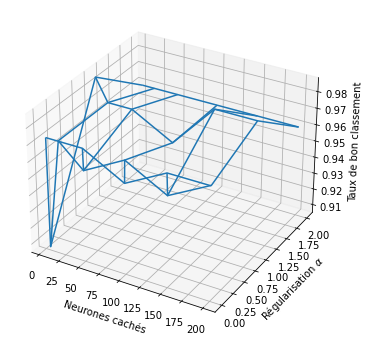

In [12]:
n_hidden = np.array([s[0] for s in tuned_parameters['hidden_layer_sizes']])
alphas = np.array(tuned_parameters['alpha'])

# création de la grille des hyperparamètres
xx, yy = np.meshgrid(n_hidden, alphas)
scores = clf.cv_results_['mean_test_score'].reshape(xx.shape)

# affichage sous forme de fil de fer de la surface des résultats des modèles évalués
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.set_xlabel("Neurones cachés")
ax.set_ylabel("Régularisation $\\alpha$")
ax.set_zlabel("Taux de bon classement")
ax.plot_wireframe(xx, yy, scores)
plt.show()

In [13]:
clf.score(X_test, y_test)


0.9733333333333334